In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from collections import Counter

In [3]:
data_path = os.getcwd()
data_path_pre = data_path 
if not os.path.isdir(data_path_pre):
    os.mkdir(data_path_pre)
data_path_pre

'c:\\Users\\Fuzzy\\Desktop\\yi\\proposal\\formal'

In [4]:
df = pd.read_csv('wos_patent1519.csv')
print(df.columns)

print("------------------------------------")
print(" ")

Abstract = df['Abstract'].values.tolist()
Title = df['Article Title'].values.tolist()
print(Title)
print(Abstract)

Index(['Article Title', 'Keywords', 'Abstract', 'Publication Year',
       'Research Areas'],
      dtype='object')
------------------------------------
 
["Mr Skemp's preposterous provision: the drafting of the Patents Act 1977 and harmonization in the 1970s", 'An Intellectual Property Primer for Nanomedical Researchers and Engineers', "The compliance of South Africa's patents compulsory licensing regime to the TRIPs Agreement", 'Minutes of Evidence of the Select Committee on the Letters Patent for Invention Act 1835', 'Commercial Law', 'Biotechnology patenting caught between Union law and EPC law: European bundle patents, unitary patents and intentional harmonization of decisions in the internal market', 'SALVAGING THE LAW OF PATENT VENUE: BRUNETTE, TC HEARTLAND, AND THE VENUE CLARIFICATION ACT', 'Licensing Issues in Nanotechnology', 'Pharmaceutical patents', 'The need for a new Copyright Act: a case study in law reform The Herchel Smith Intellectual Property Lecture 2014', 'Patentin

In [5]:
df = pd.read_csv('wos_patent1519.csv')
print(df.columns)

print("------------------------------------")
print(" ")

Abstract = df['Abstract'].values.tolist()
Title = df['Article Title'].values.tolist()
print(Title)
print(Abstract)

Index(['Article Title', 'Keywords', 'Abstract', 'Publication Year',
       'Research Areas'],
      dtype='object')
------------------------------------
 
["Mr Skemp's preposterous provision: the drafting of the Patents Act 1977 and harmonization in the 1970s", 'An Intellectual Property Primer for Nanomedical Researchers and Engineers', "The compliance of South Africa's patents compulsory licensing regime to the TRIPs Agreement", 'Minutes of Evidence of the Select Committee on the Letters Patent for Invention Act 1835', 'Commercial Law', 'Biotechnology patenting caught between Union law and EPC law: European bundle patents, unitary patents and intentional harmonization of decisions in the internal market', 'SALVAGING THE LAW OF PATENT VENUE: BRUNETTE, TC HEARTLAND, AND THE VENUE CLARIFICATION ACT', 'Licensing Issues in Nanotechnology', 'Pharmaceutical patents', 'The need for a new Copyright Act: a case study in law reform The Herchel Smith Intellectual Property Lecture 2014', 'Patentin

In [6]:
import pandas as pd

# 讀取 CSV 文件
df = pd.read_csv('wos_patent1519.csv')

# 填充 Abstract 和 Title 列中的 NaN 值為空字串，並將元素轉換為字串
Abstract = df['Abstract'].fillna('').astype(str).values.tolist()
Title = df['Article Title'].fillna('').astype(str).values.tolist()

# 將 Title 和 Abstract 列內容連接，並生成最終數據
data = [f'{Title[i]}. {Abstract[i]}' for i in range(len(Abstract))]

# 打印結果
for item in data:
    print(item)


Mr Skemp's preposterous provision: the drafting of the Patents Act 1977 and harmonization in the 1970s. The Patents Act 1977 created a new law of patents based on the European Patent Convention (1973). However, the wording of the Act did not 'copy out' the text of the Convention, but was drafted in traditional statutory language to give it effect. Nevertheless, to facilitate harmonization, the Act included a unique provision in British law: section 130(7). Both the drafter's approach and this 'preposterous' provision have been lamented by the patent judiciary for nearly four decades. But is this criticism fair?
An Intellectual Property Primer for Nanomedical Researchers and Engineers. 
The compliance of South Africa's patents compulsory licensing regime to the TRIPs Agreement. In South Africa, patents compulsory licences can be issued under the Patents Act or Competition Act although the latter is not explicit. Whereas there has not been a single compulsory licence issued through the P

In [7]:
data_lemmatized = np.load(rf'{data_path}\\corpus\\data_lemmatized.npy',allow_pickle=True)
id2word         = np.load(rf'{data_path}\\corpus\\id2word.npy',allow_pickle=True)
corpus          = np.load(rf'{data_path}\\corpus\\word_count_corpus_pmi.npy',allow_pickle=True).tolist()
cp              = np.load(rf'{data_path}\\corpus\\word_count.npy',allow_pickle=True)

#id2word = corpora.Dictionary(data_lemmatized)

In [8]:
from sentence_transformers import SentenceTransformer
BERT    = "sentence-transformers/msmarco-bert-base-dot-v5"
RoBERTa = "all-roberta-large-v1"
MPnet   = "all-mpnet-base-v2"
proto ="all-MiniLM-L6-v2"

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_model = TfidfVectorizer(stop_words="english")

from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [10]:
from bertopic import BERTopic

# 將每個文檔轉換為字符串（如果不是字符串的話）
data_lemmatized = [str(doc) for doc in data_lemmatized]
data_lemmatized


["['patents', '1977', 'create', 'law', 'of', 'patent', 'base', 'european', 'patent', 'convention', '1973', 'wording', 'of', 'copy', 'text', 'of', 'convention', 'draft', 'traditional', 'statutory_language', 'facilitate', 'harmonization', 'unique', 'provision', 'british', 'law', '130', '7', 'drafter', 'approach', 'preposterous', 'provision', 'lament', 'patent', 'judiciary', 'decade', 'criticism', 'fair']",
 "['of', 'priority', 'establish', 'paris_convention', 'protection', 'of', 'industrial_property', 'patent', 'applicant', 'claim', 'filing', 'of', 'application', 'subsequent', 'application_file', 'twelve_month', 'paris_convention', 'contracting', 'claim', 'person', 'file', 'application', 'successor', 'title', 'priority_validly', 'claim', 'patent_application', 'patent', 'rely', 'reject', 'revoke_invalidate', 'national', 'regional', 'rule_govern', 'claim_priority', 'priority', 'divide_share', 'transfer_independently', 'of', 'priority', 'application', 'requirement', 'valid_transfer', 'count

In [13]:
#cleaned_docs = topic_model._preprocess_text(data)
#print(cleaned_docs)
#embeddings = topic_model._extract_embeddings(data)
#print(embeddings.shape)

In [11]:
# BERT
from bertopic import BERTopic
sentence_model = SentenceTransformer(BERT)
# 检查并确保 item 是包含字符串的列表

# 重新运行模型
#to0pics, probs = topic_model.fit_transform(item)

#topic_model1 = BERTopic(embedding_model = sentence_model, vectorizer_model=vectorizer_model, ctfidf_model=ctfidf_model, n_gram_range=(1, 3))
#topics1, probs1 = topic_model1.fit_transform(data_lemmatized)


You try to use a model that was created with version 3.0.0.dev0, however, your version is 2.4.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





In [ ]:
#temp=np.asarray(embeddings)
#np.save('model\\embeddings_BERT.npy',temp)

In [ ]:
#topic_model.save("model\\BERT_topic_model")

In [16]:
print("Topics:", topics1)
print("Probabilities:", probs1)

Topics: [-1, -1, -1, 9, 55, -1, 4, -1, 43, 16, 4, 27, 11, 23, -1, -1, -1, 12, -1, 4, -1, 4, 4, 17, 39, 17, 48, 44, 22, -1, 4, 9, -1, -1, 43, 4, 4, -1, 4, -1, -1, 4, 22, 11, -1, -1, 4, -1, 23, -1, -1, 4, 27, 5, 11, 4, 4, 28, -1, -1, 39, 9, 23, 5, 4, 9, -1, -1, 5, 9, 5, 25, -1, 4, 5, -1, 23, 17, -1, 27, 4, -1, -1, 4, 9, -1, 4, 4, 26, 26, 4, 40, 4, -1, -1, 4, 4, -1, -1, 19, 39, 39, -1, -1, 55, 43, 11, -1, 5, 8, 39, 25, -1, 31, 22, 39, -1, -1, 40, -1, -1, 4, 4, 40, 17, 12, -1, 28, 28, 5, -1, 5, -1, 4, 40, -1, -1, -1, -1, 35, 4, 4, 4, -1, -1, -1, 9, -1, 4, 23, 9, -1, -1, -1, 16, -1, 28, -1, 7, 40, 17, -1, 23, 31, -1, -1, 4, 16, -1, -1, -1, 7, -1, -1, -1, 32, 4, 42, 40, 22, -1, 4, 7, 4, -1, 9, 4, 5, -1, 57, 44, 23, 4, -1, -1, 43, -1, 18, 26, -1, 35, 9, -1, -1, 39, 7, 27, 4, 5, -1, 15, -1, -1, -1, 57, -1, -1, -1, 40, 27, -1, -1, -1, 4, -1, 4, -1, -1, 12, -1, 0, -1, -1, 35, -1, -1, 12, 4, -1, 28, -1, -1, -1, 27, 43, 4, -1, 4, 5, -1, 28, 40, -1, 8, 28, -1, -1, 16, -1, 7, 27, -1, -1, 4, -1, 26, 

### pmi

In [ ]:
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary

# 假设 data_lemmatized 是你处理后的文本数据集
docs = data_lemmatized  # 使用处理过的文本数据

# 确保 docs 是字符串的列表
docs = [' '.join(doc) if isinstance(doc, list) else doc for doc in docs]

# 定义你的自定义模型
embedding_model = sentence_model
vectorizer_model = vectorizer_model
ctfidf_model = ctfidf_model

# 创建一个存储主题数和 CV 值的字典
coherence_values = {}

# 对文档进行简单的预处理和分词
tokenized_docs = [simple_preprocess(doc) for doc in docs]  # 现在应该是字符串列表

# 创建字典和语料库
id2word = Dictionary(tokenized_docs)  # 创建字典
corpus = [id2word.doc2bow(doc) for doc in tokenized_docs]  # 创建语料库

# 设置主题数的起始值、步长和限制
start = 10  # 起始值
step = 5   # 每次增加的步长
limit = 100  # 主题数量的上限

# 循环从 start 开始，递增到 limit，步长为 step
for num_topics in range(start, limit + 1, step):
    # 创建带有自定义参数的 BERTopic 模型，并设置希望的主题数
    topic_model1 = BERTopic(embedding_model=embedding_model,
                            vectorizer_model=vectorizer_model,
                            ctfidf_model=ctfidf_model,
                            n_gram_range=(1, 3),
                            nr_topics=num_topics)
    
    # 训练模型
    topics1, _ = topic_model1.fit_transform(docs)
    
    # 提取每个话题的关键词
    topic_keywords = topic_model1.get_topics()

    # 处理可能返回空值的情况，确保话题有效
    topic_words = []
    for topic in range(len(topic_keywords)):
        topic_data = topic_model1.get_topic(topic)
        if topic_data:  # 如果话题存在
            topic_words.append([word for word, _ in topic_data])
    
    # 检查是否有有效的主题
    if len(topic_words) > 0:
        # 计算 Coherence Value，使用已生成的 corpus 和 id2word
        coherence_model = CoherenceModel(topics=topic_words, 
                                          texts=tokenized_docs,  # 使用分词后的文本数据
                                          dictionary=id2word, 
                                          corpus=corpus,  # 确保这里的 corpus 是正确的
                                          coherence='c_v')
        
        # 计算 Coherence Value
        cv_score = coherence_model.get_coherence()
    else:
        cv_score = 0  # 如果没有主题，设为默认值
    
    # 将结果存入字典
    coherence_values[num_topics] = cv_score
    print(f"Number of topics: {num_topics}, Coherence Value (CV): {cv_score}")

# 输出所有主题数的 CV 值
print(coherence_values)


Number of topics: 10, Coherence Value (CV): 0.6740573116205957
Number of topics: 15, Coherence Value (CV): 0.5921949609044478
Number of topics: 20, Coherence Value (CV): 0.6603749053627701
Number of topics: 25, Coherence Value (CV): 0.6006207138802508
Number of topics: 30, Coherence Value (CV): 0.5763714184933377
Number of topics: 35, Coherence Value (CV): 0.5497349154060123
Number of topics: 40, Coherence Value (CV): 0.5168475119029025
Number of topics: 45, Coherence Value (CV): 0.5216640609586842
Number of topics: 50, Coherence Value (CV): 0.47712385917610783
Number of topics: 55, Coherence Value (CV): 0.46147779953055224
Number of topics: 60, Coherence Value (CV): 0.46072663333865027
Number of topics: 65, Coherence Value (CV): 0.4608939969785044
Number of topics: 70, Coherence Value (CV): 0.45518212523030577
Number of topics: 75, Coherence Value (CV): 0.49065028879447126
Number of topics: 80, Coherence Value (CV): 0.5162369534871794
Number of topics: 85, Coherence Value (CV): 0.4668

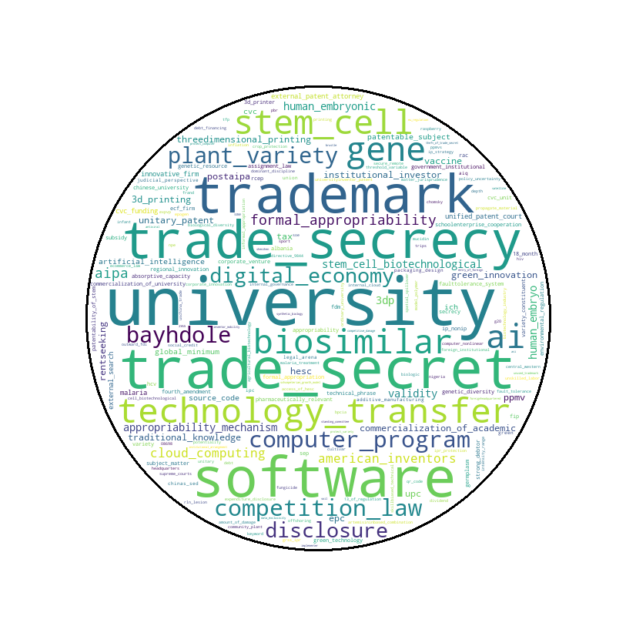

In [ ]:
### 不是論文在用的
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 假設你已經建立了bertopic模型並獲得了所有主題
topics = topic_model1.get_topics()  # 獲取所有主題的詞彙

# 創建一個空的字典來存儲所有主題的詞彙及其權重
all_words = {}

# 迭代每個主題，排除 topic-1 和 topic-0
for topic_num, words in topics.items():
    if topic_num in [-1, 0]:  # 跳過 topic-1 和 topic-0
        continue
    for word, weight in words:
        if word in all_words:
            # 如果詞已經存在，累加權重
            all_words[word] += weight
        else:
            # 如果詞不存在，則新增詞及其權重
            all_words[word] = weight

# 圓形遮罩的圖像，這裡我們使用一個簡單的圓形圖像
# 你可以使用任意自定義的圓形圖像
mask = np.array(Image.open("circle_mask.png"))

# 使用所有詞彙生成文字雲，並應用圓形遮罩
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask, contour_color='black', contour_width=3).generate_from_frequencies(all_words)

# 顯示文字雲
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


{10: 0.6405703681794457, 15: 0.646768453071476, 20: 0.6032157880215995, 25: 0.5806423796454175, 30: 0.5519496080076572, 35: 0.5224095738280434, 40: 0.5130507947701117, 45: 0.5046176487629926, 50: 0.4771305456193613, 55: 0.4780681268565229, 60: 0.47199965308454933, 65: 0.43452639179836505, 70: 0.46262699954452263, 75: 0.47268918930059567, 80: 0.459876744786547, 85: 0.4662592593396929, 90: 0.44369455132401364, 95: 0.46073503416206096, 100: 0.46684702824788016}


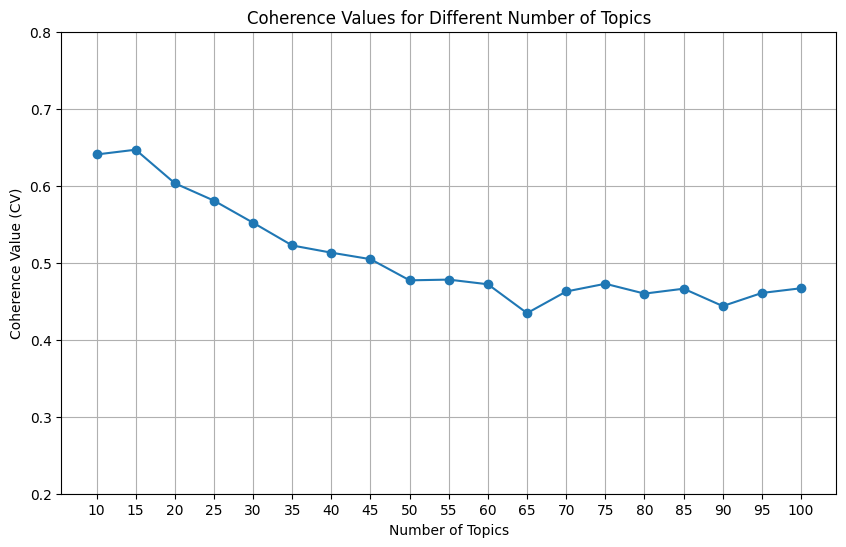

In [ ]:
import matplotlib.pyplot as plt

# 输出所有主题数的 CV 值
print(coherence_values)
coherence_df = pd.DataFrame(list(coherence_values.items()), columns=['Number of Topics', 'Coherence Value (CV)'])

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(coherence_df['Number of Topics'], coherence_df['Coherence Value (CV)'], marker='o')
plt.title('Coherence Values for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Value (CV)')
plt.ylim(0.2, 0.8)
plt.xticks(coherence_df['Number of Topics'])
plt.grid()
plt.savefig('pmiresult//coherence_score_original_加強1519.png')  # 保存为 PNG 文件
plt.show()


In [ ]:
# 检查 topic_words 是否有效
for idx, words in enumerate(topic_words):
    print(f"Topic {idx}: {words if words else 'No words'}")


Topic 0: ['remanufacturer', 'remanufacturing', 'remanufacture_product', 'closedloop_supply_chain', 'clsc', 'original_manufacturer', 'oem', 'remanufacturing_degree', 'retail_price', 'manufacturer']
Topic 1: ['3dp', '3d_printing', 'threedimensional_printing', 'pharmaceutically_relevant', 'printing', 'fdm', '3d_printer', 'additive_manufacturing', 'print', 'model_polymer']
Topic 2: ['vaccine', 'waiver', 'covid19_vaccine', 'pandemic', 'covid19_pandemic', 'covid19', 'pandemic_influenza', 'digital_health', 'global_vaccine', 'waive']
Topic 3: ['american_inventors', 'aipa', 'disclosure', 'postaipa', 'cvc', 'cvc_funding', '18_month', 'cvc_unit', 'corporate_venture', 'debt']
Topic 4: ['traditional_knowledge', 'genetic_resource', 'biological_diversity', 'tkdl', 'nagoya_protocol', 'tmk', 'biological_resource', 'indigenous_knowledge', 'indigenous', 'indigenous_people']
Topic 5: ['germplasm', 'genetic_diversity', 'cultivar', 'zea', 'expvp', 'genotype', 'descriptor', 'breeder', 'breed', 'inbred']
Topi

In [ ]:
import csv
import os

# 获取话题数据
topics = topic_model1.get_topics()

# 定义目标文件夹路径
output_dir = "C:\\Users\\Fuzzy\\Desktop\\yi\\proposal\\formal\\pmiresult"

# 确保目标文件夹存在，如果不存在则创建它
os.makedirs(output_dir, exist_ok=True)

# 定义 CSV 文件的完整路径（包括目标文件夹）
csv_filename = os.path.join(output_dir, "topics11.csv")

# 打开文件并写入话题数据
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # 写入表头
    writer.writerow(["topic", "words", "scores"])
    
    # 写入每个话题及其关键词和分数
    for topic_num, words in topics.items():
        for word, score in words:
            writer.writerow([f"topic_{topic_num}", word, score])

print(f"Topic data has been successfully exported to {csv_filename}")


Topic data has been successfully exported to C:\Users\Fuzzy\Desktop\yi\proposal\formal\pmiresult\topics11.csv


In [ ]:
# 检查主题的数量和内容
print(f"Number of topics: {len(topic_words)}")
for idx, words in enumerate(topic_words):
    print(f"Topic {idx}: {words}")


Number of topics: 62
Topic 0: ['remanufacturer', 'remanufacturing', 'remanufacture_product', 'closedloop_supply_chain', 'clsc', 'original_manufacturer', 'oem', 'remanufacturing_degree', 'retail_price', 'manufacturer']
Topic 1: ['3dp', '3d_printing', 'threedimensional_printing', 'pharmaceutically_relevant', 'printing', 'fdm', '3d_printer', 'additive_manufacturing', 'print', 'model_polymer']
Topic 2: ['vaccine', 'waiver', 'covid19_vaccine', 'pandemic', 'covid19_pandemic', 'covid19', 'pandemic_influenza', 'digital_health', 'global_vaccine', 'waive']
Topic 3: ['american_inventors', 'aipa', 'disclosure', 'postaipa', 'cvc', 'cvc_funding', '18_month', 'cvc_unit', 'corporate_venture', 'debt']
Topic 4: ['traditional_knowledge', 'genetic_resource', 'biological_diversity', 'tkdl', 'nagoya_protocol', 'tmk', 'biological_resource', 'indigenous_knowledge', 'indigenous', 'indigenous_people']
Topic 5: ['germplasm', 'genetic_diversity', 'cultivar', 'zea', 'expvp', 'genotype', 'descriptor', 'breeder', 'b

In [ ]:
topic_model1.get_topic_info()

Topic  Count                                               Name  \
0      -1   1348              -1_space_hybrid_pae_country_phthalate   
1       0     15  0_remanufacturer_remanufacturing_remanufacture...   
2       1     13  1_3dp_3d_printing_threedimensional_printing_ph...   
3       2     73          2_vaccine_covid19_vaccine_pandemic_waiver   
4       3     22      3_disclosure_aipa_american_inventors_postaipa   
5       4     23         4_genetic_diversity_germplasm_cultivar_zea   
6       5     44  5_traditional_knowledge_genetic_resource_biolo...   
7       6     16  6_stem_cell_human_embryo_stem_cell_biotechnolo...   
8       7    126  7_plant_variety_synthetic_biology_gene_biotech...   
9       8     12  8_formal_appropriability_appropriability_mecha...   
10      9     29  9_data_exclusivity_trips_bilateral_regional_human   
11     10    355        10_drug_generic_drug_generic_pharmaceutical   
12     11     17     11_antiviral_hcv_darunavir_sofosbuvirribavirin   
13     12     20    12_epogen_pcm_highvalue_patent_dual_distributor   
14     13    138  13_green_innovation_green_technology_green_env...   
15     14     57     14_biosimilar_bpcia_biologic_reference_product   
16     15     37           15_infection_chmi_sporozoite_parasitemia   
17     16     21                      16_ppmv_malaria_ppmvs_nigeria   
18     17    123                   17_patient_graft_artery_aneurysm   
19     18     27  18_computer_program_software_g20_protect_computer   
20     19    177                  19_pathway_compound_cell_receptor   
21     20     20                   20_soil_fungicide_mucidin_fungus   
22     21     12  21_henna_leave_elmbr_current_density_encapsula...   
23     22     91               22_bracket_damper_building_prototype   
24     23     12             23_ralf_enamel_water_outflow_container   
25     24     19         24_land_government_speech_properly_theatre   
26     25     40  25_electric_vehicle_feedin_tariff_catalytic_co...   
27     26     40  26_ai_artificial_intelligence_aigenerate_emoti...   
28     27     20  27_fourth_amendment_ecommerce_law_unused_trade...   
29     28     16     28_unitary_patent_upc_epc_unified_patent_court   
30     29     56  29_subsidy_patent_breadth_inequality_schumpete...   
31     30     14  30_subject_matter_patentable_subject_guidance_...   
32     31     35             31_secrecy_trade_secret_secret_qr_code   
33     32     35  32_trade_secret_trade_secrecy_theft_of_trade_s...   
34     33     11  33_ip_nonip_strategic_dealer_ip_strategy_india...   
35     34     31            34_chomsky_intellectual_sport_discourse   
36     35    112            35_ipr_protection_ipr_export_strong_ipr   
37     36     14  36_legal_arena_judicial_perspective_ip_tribuna...   
38     37     13  37_digital_economy_cloud_computing_regional_in...   
39     38     12  38_university_commercialization_of_academic_ch...   
40     39     20  39_bayhdole_university_marchin_university_pate...   
41     40     16       40_rentseeking_key_laboratory_chinas_sed_tfp   
42     41     16  41_institutional_investor_faulttolerance_syste...   
43     42     28  42_innovative_firm_strong_debtor_debt_financin...   
44     43     37             43_license_licensor_licensee_incumbent   
45     44    202  44_network_collaborative_innovation_ris_interc...   
46     45     43  45_university_tto_universityindustry_collabora...   
47     46     33  46_government_institutional_patenting_motive_n...   
48     47     11  47_infringement_litigation_class_action_litiga...   
49     48     48                       48_sep_frand_implementer_asi   
50     49     21  49_patenting_strategy_external_patent_attorney...   
51     50     28  50_technical_phrase_clearinghouse_keyword_topi...   
52     51     41  51_trademark_threedimensional_shape_trade_mark...   
53     52     32  52_copyright_artistic_conceptual_separability_...   
54     53    141  53_federal_circuit_pto_supreme_court_district_...   

                           

In [ ]:
import os
import pandas as pd

# 获取主题信息
topic_info = topic_model1.get_topic_info()

# 创建一个新列来保存每个主题的前20个词汇
topic_words = []

# 遍历每个主题，提取前20个词汇
for topic_num in topic_info['Topic']:
    if topic_num == -1:  # 排除不属于任何主题的噪音
        topic_words.append('No words')
    else:
        words = topic_model1.get_topic(topic_num)  # 获取该主题的词汇及权重
        top_words = [word for word, _ in words[:20]]  # 抓取前20个词汇
        topic_words.append(", ".join(top_words))  # 将前20个词汇合并为字符串

# 将抓取的词汇添加到topic_info中作为新列
topic_info['Top 20 Words'] = topic_words

# 指定保存的文件夹路径（可选）
folder_path = "C:\\Users\\Fuzzy\\Desktop\\yi\\proposal\\formal\\pmiresult"

# 如果文件夹不存在，则创建该文件夹
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# 保存主题信息到 CSV 文件
csv_file_path = os.path.join(folder_path, 'topic_info11_加強1519.csv')
topic_info.to_csv(csv_file_path, index=False)

print(f"Topic information saved successfully at {csv_file_path}.")


Topic information saved successfully at C:\Users\Fuzzy\Desktop\yi\proposal\formal\pmiresult\topic_info11_加強1519.csv.


In [ ]:
# 初始化 DataFrame
df_coh_cv = pd.DataFrame(columns=['Num Topics', 'CV'])

# 将 Num Topics 和 Coherence Value 添加到 DataFrame 中
for num_topics, cv in coherence_values.items():
    pd_cv = pd.DataFrame({'Num Topics': [num_topics], 'CV': [cv]})
    df_coh_cv = pd.concat([df_coh_cv, pd_cv], ignore_index=True)

# 将结果保存为 CSV 文件
df_coh_cv.to_csv('pmiresult//bertopic_coherence_value加強1519.csv', index=False)

# 打印 DataFrame
print(df_coh_cv)


   Num Topics        CV
0          10  0.636352
1          15  0.585275
2          20  0.629395
3          25  0.604572
4          30  0.609647
5          35  0.546577
6          40  0.521507
7          45  0.515071
8          50  0.477038
9          55  0.478682
10         60  0.458441
11         65  0.455452
12         70  0.474677
13         75  0.456808
14         80  0.445141
15         85  0.453621
16         90  0.439471
17         95  0.467904
18        100  0.468630
